In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../from_arc/unet_2d_cv.csv')

In [3]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df

,label,version,fold,hparams_batch_size,hparams_cuda,hparams_data_dirs,hparams_dropout,hparams_early_stopping_patience,hparams_epochs,hparams_folds,...,metrics_train_loss_epoch_final,metrics_train_dsc_0_epoch_min,metrics_train_dsc_0_epoch_max,metrics_train_dsc_0_epoch_final,metrics_train_dsc_1_epoch_min,metrics_train_dsc_1_epoch_max,metrics_train_dsc_1_epoch_final,metrics_train_dsc_2_epoch_min,metrics_train_dsc_2_epoch_max,metrics_train_dsc_2_epoch_final
0,unet_2d_cv,16626350,0,256,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.3,40,50,5,...,0.292430,0.681204,0.900906,0.900906,0.456685,0.858124,0.851985,0.611577,0.931194,0.927791
1,unet_2d_cv,16626348,0,256,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.1,40,50,5,...,0.300939,0.668711,0.904058,0.899227,0.448461,0.858604,0.851216,0.583416,0.932357,0.925006
2,unet_2d_cv,16626349,0,256,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.1,40,50,5,...,0.442625,0.326026,0.883453,0.878193,0.385500,0.768144,0.767474,0.504065,0.871049,0.869396
3,unet_2d_cv,16626351,0,256,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.3,40,50,5,...,0.491376,0.496375,0.864056,0.858452,0.223600,0.752328,0.748480,0.609072,0.854648,0.854648
4,unet_2d_cv,16626352,0,256,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.5,40,50,5,...,0.323455,0.661712,0.895755,0.895755,0.389849,0.837261,0.837012,0.641966,0.918922,0.918922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,unet_2d_cv,16626363,3,128,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.3,40,50,5,...,0.299227,0.448745,0.894272,0.894181,0.472728,0.868542,0.868542,0.521901,0.932353,0.932353
86,unet_2d_cv,16626364,3,128,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.5,40,50,5,...,0.222689,0.694933,0.906965,0.906801,0.463945,0.900159,0.897651,0.587111,0.955951,0.953909
87,unet_2d_cv,16626362,4,128,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.3,40,50,5,...,0.168891,0.733709,0.920484,0.914597,0.524861,0.924040,0.921623,0.673403,0.969601,0.967673
88,unet_2d_cv,16626363,4,128,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.3,40,50,5,...,0.286601,0.515418,0.891924,0.891634,0.454506,0.874929,0.874929,0.493387,0.938286,0.938286


In [4]:
col_rename_dict = {}
for col in df.columns:
    if "metrics" in col:
        col_str = col
        col_str = col_str.replace("metrics_", "")
        col_str = col_str.replace("metrics ", "")
        col_str = col_str.replace("dsc_0", "cort_dice")
        col_str = col_str.replace("dsc_1", "trab_dice")
        col_str = col_str.replace("dsc_2", "back_dice")
        col_rename_dict[col] = col_str
df.rename(columns=col_rename_dict, inplace=True)

In [5]:
id_vars = ["label", "version", "fold"]
for col in df.columns:
    if "hparams" in col:
        id_vars.append(col)
df = pd.melt(df, id_vars=id_vars)
df

,label,version,fold,hparams_batch_size,hparams_cuda,hparams_data_dirs,hparams_dropout,hparams_early_stopping_patience,hparams_epochs,hparams_folds,...,hparams_log_on_step,hparams_log_step_interval,hparams_log_sync_dist,hparams_logger,hparams_model_channels,hparams_num_workers,hparams_output_channels,hparams_version,variable,value
0,unet_2d_cv,16626350,0,256,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.3,40,50,5,...,True,3,True,True,"[32, 64, 128, 256]",4,3,16626350,val_loss_epoch_min,0.241377
1,unet_2d_cv,16626348,0,256,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.1,40,50,5,...,True,3,True,True,"[32, 64, 128, 256]",4,3,16626348,val_loss_epoch_min,0.257983
2,unet_2d_cv,16626349,0,256,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.1,40,50,5,...,True,3,True,True,"[32, 64, 128, 256]",4,3,16626349,val_loss_epoch_min,0.384656
3,unet_2d_cv,16626351,0,256,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.3,40,50,5,...,True,3,True,True,"[32, 64, 128, 256]",4,3,16626351,val_loss_epoch_min,0.417840
4,unet_2d_cv,16626352,0,256,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.5,40,50,5,...,True,3,True,True,"[32, 64, 128, 256]",4,3,16626352,val_loss_epoch_min,0.257010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,unet_2d_cv,16626363,3,128,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.3,40,50,5,...,True,3,True,True,"[32, 64, 128, 256, 512]",4,3,16626363,train_back_dice_epoch_final,0.932353
2156,unet_2d_cv,16626364,3,128,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.5,40,50,5,...,True,3,True,True,"[32, 64, 128, 256, 512]",4,3,16626364,train_back_dice_epoch_final,0.953909
2157,unet_2d_cv,16626362,4,128,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.3,40,50,5,...,True,3,True,True,"[32, 64, 128, 256, 512]",4,3,16626362,train_back_dice_epoch_final,0.967673
2158,unet_2d_cv,16626363,4,128,True,['/home/njneetes/work/data/NORMXTII/radius_pic...,0.3,40,50,5,...,True,3,True,True,"[32, 64, 128, 256, 512]",4,3,16626363,train_back_dice_epoch_final,0.938286


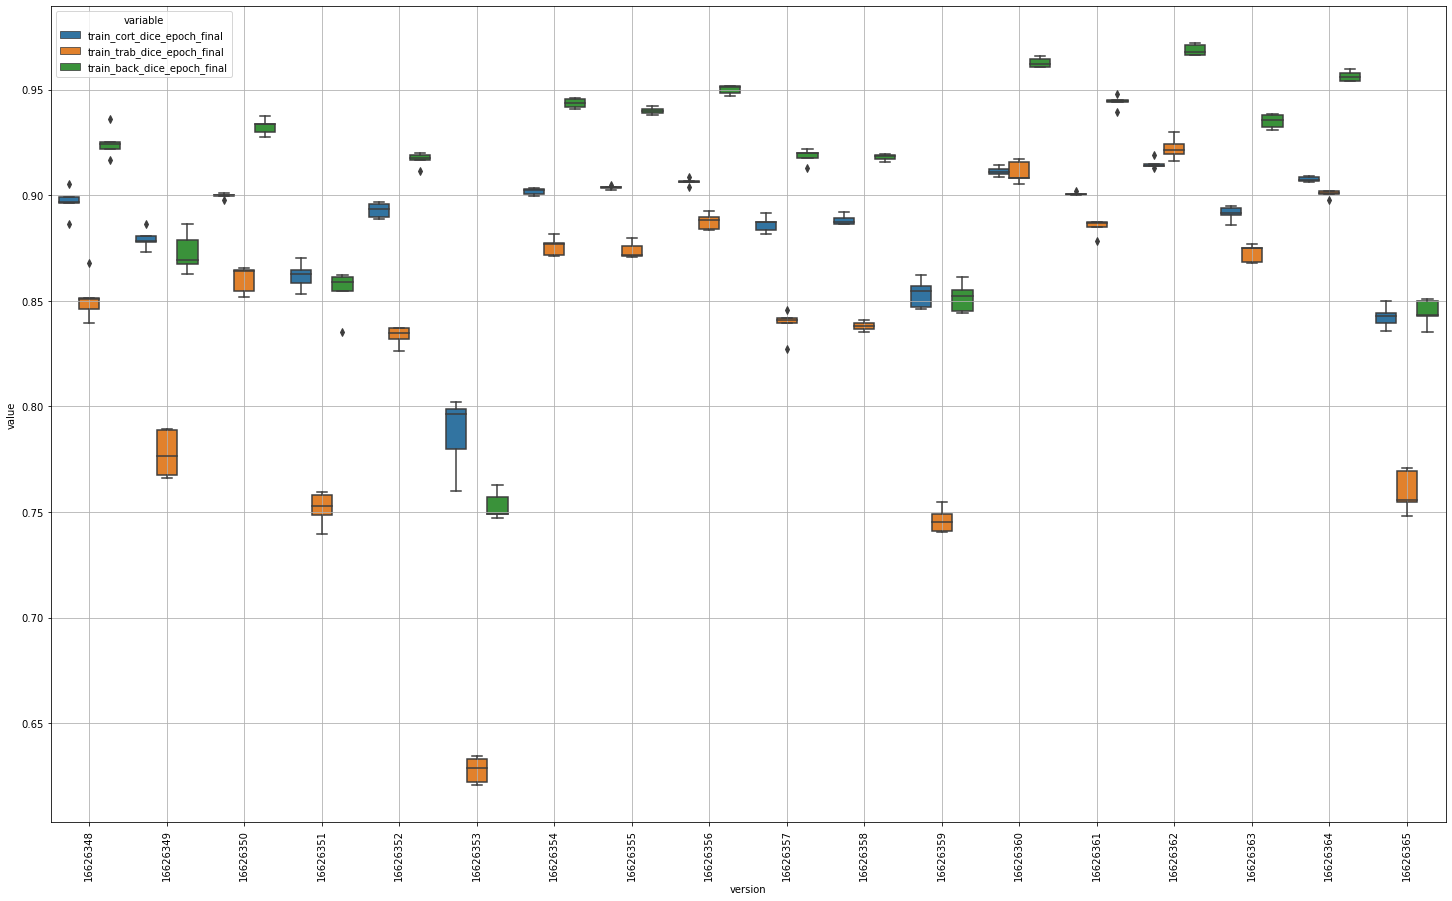

In [11]:
plt.figure(figsize=(25,15))
sns.boxplot(
    data=df[df["variable"].str.contains("train") & df["variable"].str.contains("dice") & df["variable"].str.contains("final")], 
    x="version", y="value", hue="variable"
)
plt.xticks(rotation=90)
plt.grid()
plt.show()

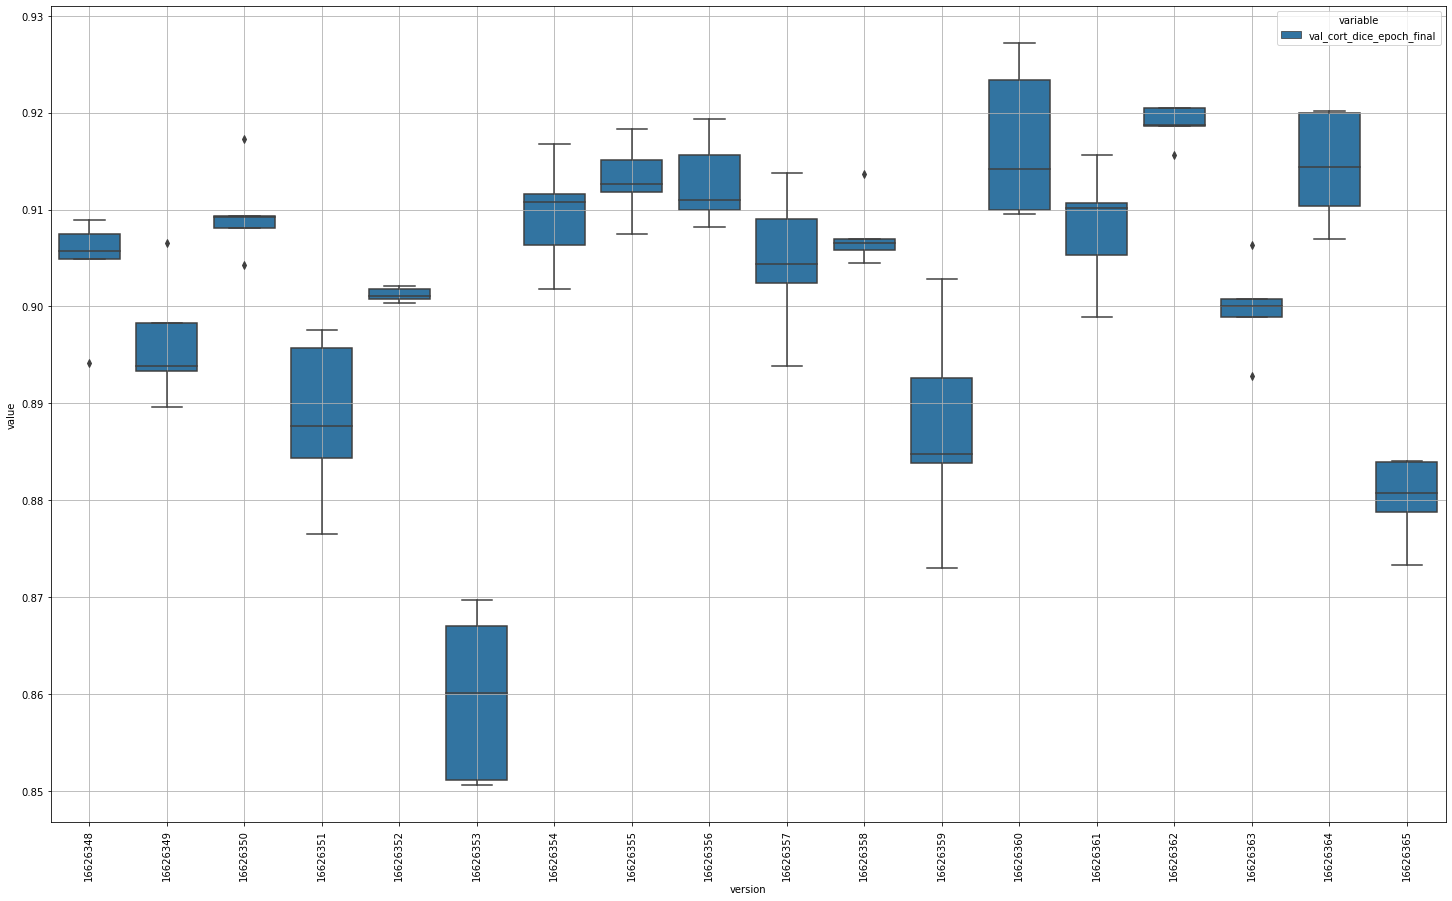

In [12]:
plt.figure(figsize=(25,15))
sns.boxplot(
    data=df[df["variable"].str.contains("val") & df["variable"].str.contains("cort_dice") & df["variable"].str.contains("final")], 
    x="version", y="value", hue="variable"
)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [8]:
df_averaged = df.groupby(["version", "variable"], as_index=False)['value'].mean()
df_averaged_cort_dice = df_averaged[df_averaged["variable"]=="val_cort_dice_epoch_final"]
df_averaged_cort_dice.sort_values(by="value", ascending=False)

,version,variable,value
351,16626362,val_cort_dice_epoch_final,0.918798
303,16626360,val_cort_dice_epoch_final,0.916831
399,16626364,val_cort_dice_epoch_final,0.914410
183,16626355,val_cort_dice_epoch_final,0.913083
207,16626356,val_cort_dice_epoch_final,0.912806
63,16626350,val_cort_dice_epoch_final,0.909625
159,16626354,val_cort_dice_epoch_final,0.909447
327,16626361,val_cort_dice_epoch_final,0.908146
255,16626358,val_cort_dice_epoch_final,0.907500
231,16626357,val_cort_dice_epoch_final,0.904676


In [9]:
best_version = df_averaged_cort_dice.sort_values(by="value", ascending=False)['version'].iloc[0]
df[df["version"] == best_version][[col for col in df.columns if "hparam" in col]].iloc[0]

hparams_batch_size                                                               128
hparams_cuda                                                                    True
hparams_data_dirs                  ['/home/njneetes/work/data/NORMXTII/radius_pic...
hparams_dropout                                                                  0.3
hparams_early_stopping_patience                                                   40
hparams_epochs                                                                    50
hparams_folds                                                                      5
hparams_hours_per_fold                                                             4
hparams_input_channels                                                             1
hparams_is_3d                                                                  False
hparams_label                                                             unet_2d_cv
hparams_learning_rate                                            

In [10]:
df[df["version"] == best_version].groupby(["variable"])['value'].mean()

variable
train_back_dice_epoch_final    0.968692
train_back_dice_epoch_max      0.969762
train_back_dice_epoch_min      0.675936
train_cort_dice_epoch_final    0.914875
train_cort_dice_epoch_max      0.916759
train_cort_dice_epoch_min      0.720454
train_loss_epoch_final         0.168583
train_loss_epoch_max           0.971874
train_loss_epoch_min           0.164936
train_trab_dice_epoch_final    0.922322
train_trab_dice_epoch_max      0.923836
train_trab_dice_epoch_min      0.526700
val_back_dice_epoch_final      0.964754
val_back_dice_epoch_max        0.974757
val_back_dice_epoch_min        0.801845
val_cort_dice_epoch_final      0.918798
val_cort_dice_epoch_max        0.923932
val_cort_dice_epoch_min        0.838454
val_loss_epoch_final           0.175304
val_loss_epoch_max             0.591798
val_loss_epoch_min             0.145207
val_trab_dice_epoch_final      0.920382
val_trab_dice_epoch_max        0.932659
val_trab_dice_epoch_min        0.695815
Name: value, dtype: float64